# GBDT Boosting for Quick, Draw!

In [180]:
import requests
import numpy as np
import pandas as pd
from io import BytesIO
import pickle
from sklearn.model_selection import train_test_split

### 1. Import the pickle data
   

In [181]:
with open('xtrain_doodle.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open('xtest_doodle.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('ytrain_doodle.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('ytest_doodle.pickle', 'rb') as f:
    y_test = pickle.load(f)

### 2. GBDT 

#### 2.1 Build the Four-fold Cross validation function

In [183]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from statistics import mean

# functions for 4-FOLD Cross-Validation
def gbdt_cv(X,y,split):
    # split by 4 parts with balanced classes while I assigned split = 4
    skf = StratifiedKFold(n_splits=split,random_state=None,shuffle=False)
    skf.get_n_splits(X, y)
    # collect the 4 accuracies
    accu = []
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr_cv, X_te_cv = X[train_index], X[test_index]
        y_tr_cv, y_te_cv = y[train_index], y[test_index]
        gbdt.fit(X_tr_cv, y_tr_cv)
        accu.append(gbdt.score(X_te_cv, y_te_cv))
        print('iterations:',gbdt.n_estimators_)
    # get the mean accuracy
    mean_accu = mean(accu)
    print(mean_accu)
    
    return(mean_accu)

#### 2.2 Grid Search

##### 2.2.1 Max feature: 'sqrt'

In [204]:
## Grid Search for max_feature = 'sqrt'

n_estimators = [500]
# Number of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 31, num = 6)]

# Shrinkage of each tree's contribution
learning_rate = [0.05, 0.1]

# The fraction of samples to be used for fitting the individual base learners
subsample = [0.4, 0.5, 0.6]

# Minimum number of samples required to split a node
min_samples_split = [2]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1]

In [198]:
#combinations of parameters
import itertools
param_sqrt = [n_estimators, max_features, max_depth, learning_rate, subsample, min_samples_split, min_samples_leaf]
combi_sqrt = list(itertools.product(*param_sqrt))

In [232]:
#Parameter tuning when max_features is "sqrt"
gbdt = GradientBoostingClassifier(loss='deviance', criterion='friedman_mse', n_iter_no_change=30, verbose=0)
acc = [0]*len(combi_sqrt)

for i in range(len(combi_sqrt)):
    param = combi_sqrt[i]
    gbdt.set_params(n_estimators=param[0], max_features=param[1], max_depth=param[2], learning_rate=param[3], 
                    subsample=param[4], min_samples_split=param[5], min_samples_leaf=param[6])
    
    acc[i] = gbdt_cv(X_train,y_train,split = 4)


iterations: 500
iterations: 500
iterations: 500
iterations: 500
0.460957845
iterations: 500
iterations: 455
iterations: 500
iterations: 500
0.461749387
iterations: 500
iterations: 500
iterations: 500
iterations: 500
0.460957122
iterations: 245
iterations: 479
iterations: 319
iterations: 500
0.469043798
iterations: 360
iterations: 249
iterations: 500
iterations: 347
0.470624368
iterations: 500
iterations: 500
iterations: 500
iterations: 500
0.477082085
iterations: 491
iterations: 500
iterations: 335
iterations: 500
0.603539518
iterations: 490
iterations: 500
iterations: 479
iterations: 449
0.616666042
iterations: 500
iterations: 455
iterations: 444
iterations: 441
0.620331571
iterations: 73
iterations: 80
iterations: 65
iterations: 297
0.547756076
iterations: 262
iterations: 212
iterations: 269
iterations: 190
0.593663911
iterations: 242
iterations: 239
iterations: 238
iterations: 254
0.598540502
iterations: 457
iterations: 438
iterations: 422
iterations: 211
0.582455276
iterations: 49

In [202]:
#Parameter and accuracy for 'sqrt'
param = pd.DataFrame(combi_sqrt, columns = ['n_estimators', 'max_features', 'max_depth', 'learning_rate', 
                    'subsample', 'min_samples_split', 'min_samples_leaf'])
accuracy = pd.DataFrame(acc, columns = ['accuracy'])
pd.concat([param, accuracy], axis = 1)

,n_estimators,max_features,max_depth,learning_rate,subsample,min_samples_split,min_samples_leaf,accuracy
0,500,sqrt,1,0.05,0.4,2,1,0.460958
1,500,sqrt,1,0.05,0.5,2,1,0.461749
2,500,sqrt,1,0.05,0.6,2,1,0.460957
3,500,sqrt,1,0.10,0.4,2,1,0.469044
4,500,sqrt,1,0.10,0.5,2,1,0.470624
5,500,sqrt,1,0.10,0.6,2,1,0.477082
6,500,sqrt,7,0.05,0.4,2,1,0.603540
7,500,sqrt,7,0.05,0.5,2,1,0.616666
8,500,sqrt,7,0.05,0.6,2,1,0.620332
9,500,sqrt,7,0.10,0.4,2,1,0.547756


##### 2.2.2 Max feature: 'log2'

In [195]:
## Grid Search for max_feature = 'log2'

n_estimators = [500]
# Number of features to consider at every split
max_features = ['log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 31, num = 6)]

# Shrinkage of each tree's contribution
learning_rate = [0.05, 0.1]

# The fraction of samples to be used for fitting the individual base learners
subsample = [0.4, 0.5, 0.6]

# Minimum number of samples required to split a node
min_samples_split = [2]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1]

In [199]:
#combinations of parameters
param_log2 = [n_estimators, max_features, max_depth, learning_rate, subsample, min_samples_split, min_samples_leaf]
combi_log2 = list(itertools.product(*param_log2))

In [200]:
#Parameter tuning when max_features is "log2"
gbdt = GradientBoostingClassifier(loss='deviance', criterion='friedman_mse', n_iter_no_change=30, verbose=0)
acc = [0]*len(combi_log2)

for i in range(len(combi_log2)):
    param = combi_log2[i]
    gbdt.set_params(n_estimators=param[0], max_features=param[1], max_depth=param[2], learning_rate=param[3], 
                    subsample=param[4], min_samples_split=param[5], min_samples_leaf=param[6])
    
    acc[i] = gbdt_cv(X_train,y_train,split = 4)


iterations: 500
iterations: 500
iterations: 500
iterations: 343
0.45383075889010893
iterations: 321
iterations: 500
iterations: 500
iterations: 500
0.4542506339379295
iterations: 500
iterations: 500
iterations: 500
iterations: 500
0.45949967804156144
iterations: 423
iterations: 500
iterations: 309
iterations: 500
0.468332757123905
iterations: 500
iterations: 500
iterations: 254
iterations: 500
0.4707491048298454
iterations: 500
iterations: 500
iterations: 396
iterations: 500
0.4747487858782395
iterations: 500
iterations: 500
iterations: 146
iterations: 500
0.5896627941216841
iterations: 500
iterations: 500
iterations: 500
iterations: 500
0.6080822482274685
iterations: 500
iterations: 500
iterations: 500
iterations: 500
0.6090825054601262
iterations: 271
iterations: 271
iterations: 231
iterations: 166
0.5649116398741139
iterations: 240
iterations: 253
iterations: 274
iterations: 242
0.5829563454805657
iterations: 255
iterations: 273
iterations: 336
iterations: 318
0.5955837371343947
it

In [203]:
#Parameter and accuracy
param = pd.DataFrame(combi_log2, columns = ['n_estimators', 'max_features', 'max_depth', 'learning_rate', 
                    'subsample', 'min_samples_split', 'min_samples_leaf'])
accuracy = pd.DataFrame(acc, columns = ['accuracy'])
pd.concat([param, accuracy], axis = 1)

,n_estimators,max_features,max_depth,learning_rate,subsample,min_samples_split,min_samples_leaf,accuracy
0,500,log2,1,0.05,0.4,2,1,0.453831
1,500,log2,1,0.05,0.5,2,1,0.454251
2,500,log2,1,0.05,0.6,2,1,0.459500
3,500,log2,1,0.10,0.4,2,1,0.468333
4,500,log2,1,0.10,0.5,2,1,0.470749
5,500,log2,1,0.10,0.6,2,1,0.474749
6,500,log2,7,0.05,0.4,2,1,0.589663
7,500,log2,7,0.05,0.5,2,1,0.608082
8,500,log2,7,0.05,0.6,2,1,0.609083
9,500,log2,7,0.10,0.4,2,1,0.564912


##### 2.2.3 Trails after above grid search

In [205]:
## max_depth = 5
gbdt = GradientBoostingClassifier(loss='deviance', criterion='friedman_mse', n_iter_no_change=30, 
                                  n_estimators=1000, max_features='sqrt', max_depth=5, learning_rate=0.05, 
                                  subsample=1, min_samples_split=2, min_samples_leaf=1,verbose=0)
acc_5 = gbdt_cv(X_train,y_train,split = 4)


iterations: 803
iterations: 800
iterations: 981
iterations: 799
0.6299152391116507


In [206]:
## max_depth = 6
gbdt = GradientBoostingClassifier(loss='deviance', criterion='friedman_mse', n_iter_no_change=30, 
                                  n_estimators=1000, max_features='sqrt', max_depth=6, learning_rate=0.05, 
                                  subsample=1, min_samples_split=2, min_samples_leaf=1,verbose=0)
acc_6 = gbdt_cv(X_train,y_train,split = 4)


iterations: 510
iterations: 665
iterations: 641
iterations: 611
0.6321652119172521


In [207]:
## max_depth = 7
gbdt = GradientBoostingClassifier(loss='deviance', criterion='friedman_mse', n_iter_no_change=30, 
                                  n_estimators=1000, max_features='sqrt', max_depth=7, learning_rate=0.05, 
                                  subsample=1, min_samples_split=2, min_samples_leaf=1,verbose=0)
acc_7 = gbdt_cv(X_train,y_train,split = 4)


iterations: 373
iterations: 445
iterations: 435
iterations: 454
0.6239993838608742


### 3. Get the final optimal model

In [30]:
#The optimal model
gbdt_opt1 = GradientBoostingClassifier(loss='deviance', criterion='friedman_mse', n_iter_no_change=30, verbose=0,
                                      n_estimators=1000,  ='sqrt', max_depth=6, learning_rate=0.05, 
                                       subsample=1, min_samples_split=2, min_samples_leaf=1)
gbdt_opt1.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=30, presort='auto', random_state=None,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [192]:
# Final number of iterations to get the optimal model
print('The number of iterations to get our final optimal GBDT model is',gbdt_opt1.n_estimators_)

The number of iterations to get our final optimal GBDT model is 630


In [31]:
# get the y prediction as pred
pred = gbdt_opt1.predict(X_test)

In [216]:
y_score = gbdt_opt1.decision_function(X_test)

In [231]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred,target_names = class_names))

              precision    recall  f1-score   support

       mouse       0.66      0.64      0.65       645
         ant       0.62      0.59      0.61       611
        bear       0.64      0.70      0.67       615
         bee       0.67      0.57      0.62       594
  sea turtle       0.68      0.66      0.67       565
         cat       0.49      0.52      0.50       582
        crab       0.60      0.63      0.62       616
      dragon       0.63      0.66      0.65       593
    elephant       0.58      0.59      0.58       559
       snail       0.80      0.80      0.80       620

   micro avg       0.64      0.64      0.64      6000
   macro avg       0.64      0.64      0.64      6000
weighted avg       0.64      0.64      0.64      6000



### 4. Visualize the result
Reference codes:

multiclass ROC: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

https://stackoverflow.com/questions/45332410/sklearn-roc-for-multiclass-classification

In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle

In [222]:
#Binarize the classification
y_test_bin = label_binarize(y_test, classes=[i for i in range(10)])

In [228]:
#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

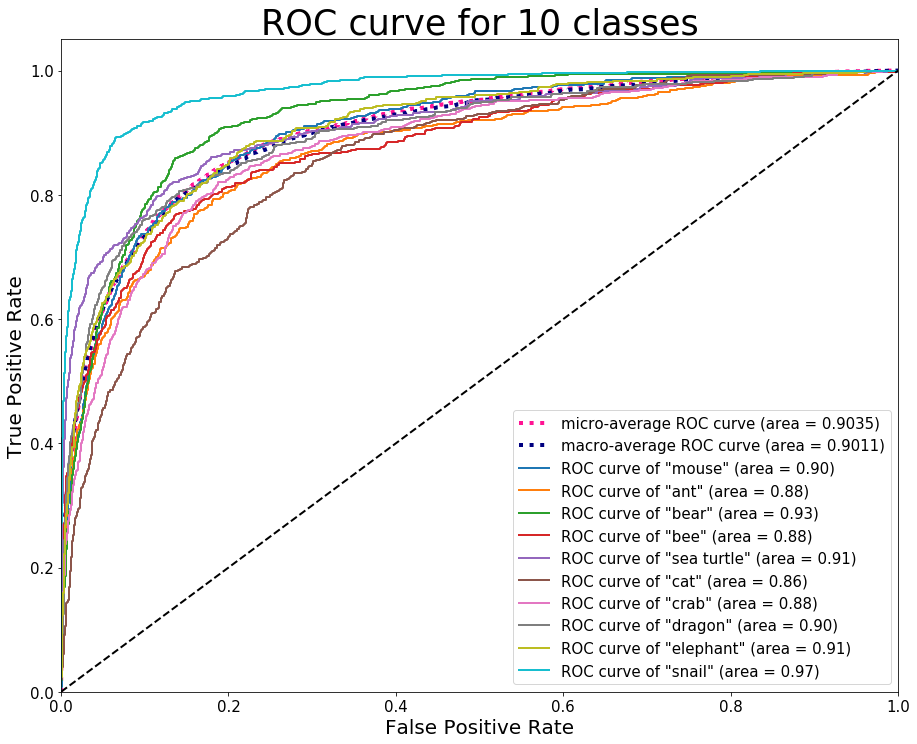

In [229]:
# Compute macro-average ROC curve and ROC area
n_classes = 10
class_names = np.array(['mouse', 'ant', 'bear', 'bee', 'sea turtle', 'cat', 
                        'crab', 'dragon', 'elephant', 'snail'])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (15, 12))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],lw=2,
             label='ROC curve of "{0}" (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('ROC curve for 10 classes',fontsize=35)
plt.legend(loc="lower right",prop=dict(size=15))
plt.savefig('gdbt_ROC.eps', format='eps', dpi=1000)
plt.show()

In [226]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score,
                                                     average="micro")

# Accuracy, Precision, Recall and F1
print('The mean accuracy on the given test data and labels: {0:0.5f}'
      .format(gbdt_opt1.score(X_test,y_test)))
print('Average precision score, micro-averaged over all classes: {0:0.5f}'
      .format(average_precision["micro"]))
print('The recall score over all classes: {0:0.5f}'
     .format(recall_score(y_test, pred, average='micro')))
print('The F1 score over all classes: {0:0.5f}'
      .format(f1_score(y_test, pred, average='micro')))

The mean accuracy on the given test data and labels: 0.63717
Average precision score, micro-averaged over all classes: 0.63389
The recall score over all classes: 0.63717
The F1 score over all classes: 0.63717


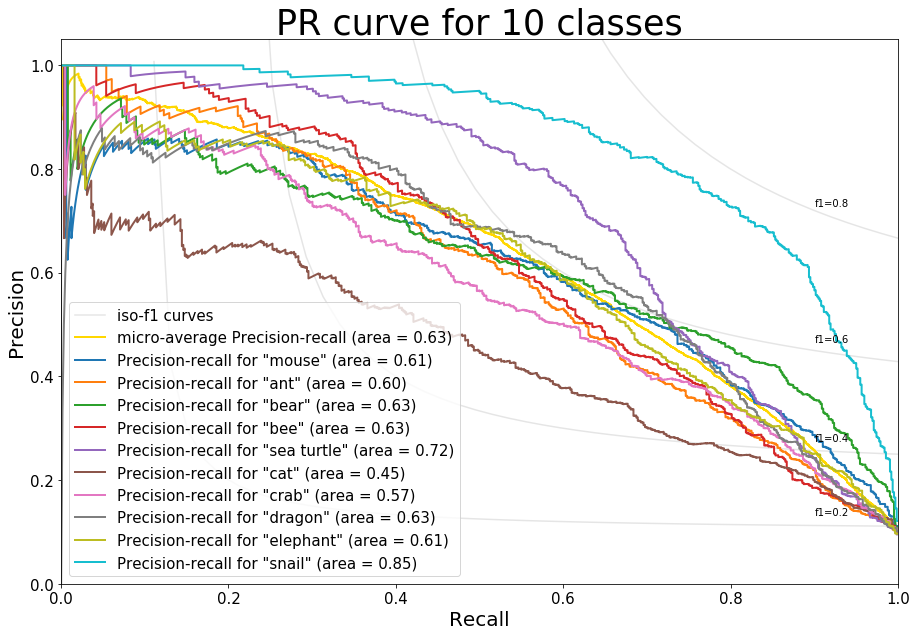

In [227]:
#Plot PR curves for each class
plt.figure(figsize=(15, 12))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i in range(n_classes):
    l, = plt.plot(recall[i], precision[i], lw=2)
    lines.append(l)
    labels.append('Precision-recall for "{0}" (area = {1:0.2f})'
                  ''.format(class_names[i], average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Recall',fontsize=20)
plt.ylabel('Precision',fontsize=20)
plt.title('PR curve for 10 classes',fontsize=35)
plt.legend(lines, labels, loc="lower left", prop=dict(size=15))
#loc=(0, -0.8),
plt.savefig('gdbt_PR.eps', format='eps', dpi=1000)
plt.show()

Confusion Matrix:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [139]:
from sklearn.metrics import confusion_matrix

In [146]:
def plot_confusion_matrix(cm, classes,axis_labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 35)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, axis_labels, rotation=-30,fontsize=15)
    plt.yticks(tick_marks, axis_labels, fontsize=15)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize = 20)
    plt.xlabel('Predicted label',fontsize = 20)
    plt.tight_layout()

Confusion matrix, without normalization
[[411  11  42  11  20  46  36  40  18  10]
 [ 20 362  25  44  10  27  48  38  30   7]
 [ 29  12 432  14   8  36  22   5  26  31]
 [ 28  42  24 338  36  40  20  27  20  19]
 [ 25   9  13  21 372  43  16  18  44   4]
 [ 36  36  26  20  28 300  45  36  33  22]
 [ 19  32  19  10  15  54 391  28  38  10]
 [ 25  51  11  15  14  25  28 391  19  14]
 [ 15  22  54  18  33  26  31  22 329   9]
 [ 12   8  25  12   8  19  14  14  11 497]]


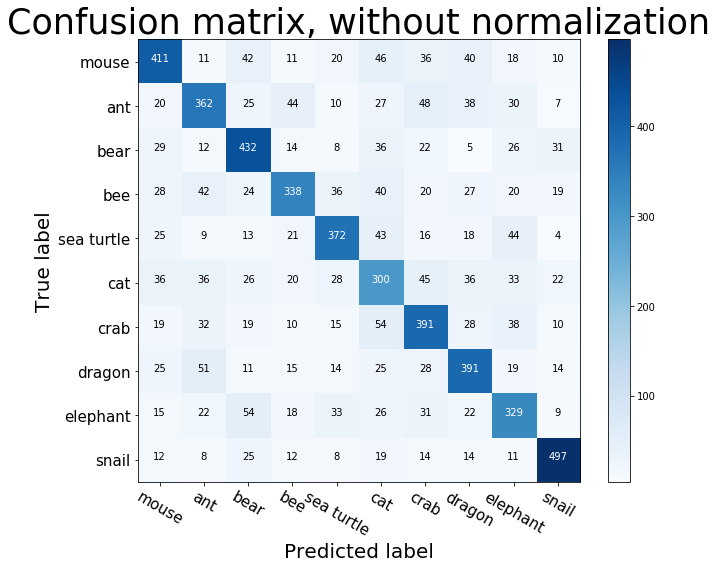

In [148]:
#Compute confusion matrix
import itertools
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10,8))
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(10)],axis_labels = np.array(class_names),
                      title='Confusion matrix, without normalization')
plt.savefig('gdbt_CF.png', format='png', dpi=1000)
plt.show()

Normalized confusion matrix
[[0.64 0.02 0.07 0.02 0.03 0.07 0.06 0.06 0.03 0.02]
 [0.03 0.59 0.04 0.07 0.02 0.04 0.08 0.06 0.05 0.01]
 [0.05 0.02 0.7  0.02 0.01 0.06 0.04 0.01 0.04 0.05]
 [0.05 0.07 0.04 0.57 0.06 0.07 0.03 0.05 0.03 0.03]
 [0.04 0.02 0.02 0.04 0.66 0.08 0.03 0.03 0.08 0.01]
 [0.06 0.06 0.04 0.03 0.05 0.52 0.08 0.06 0.06 0.04]
 [0.03 0.05 0.03 0.02 0.02 0.09 0.63 0.05 0.06 0.02]
 [0.04 0.09 0.02 0.03 0.02 0.04 0.05 0.66 0.03 0.02]
 [0.03 0.04 0.1  0.03 0.06 0.05 0.06 0.04 0.59 0.02]
 [0.02 0.01 0.04 0.02 0.01 0.03 0.02 0.02 0.02 0.8 ]]


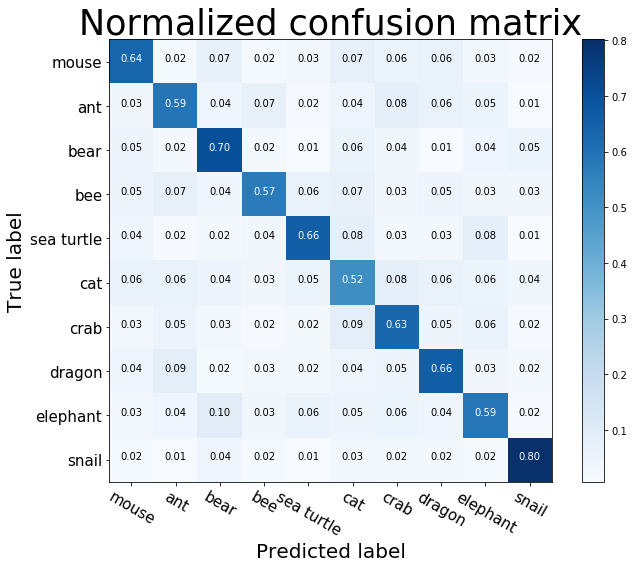

In [150]:
# Plot normalized confusion matrix
plt.figure(figsize = (10,8))
plot_confusion_matrix(cnf_matrix, axis_labels=class_names,classes=[i for i in range(10)], normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('gdbt_CF_nl.png', format='png', dpi=1000)
plt.show()